Работа с временными рядами.
    
Известно ежемесячное число смертей в результате несчастного случая в США с января 1973 по декабрь 1978, необходимо построить прогноз на следующие 2 года. Ожидаю в конце уидеть график.
При выполнении работ напишите введение и вывод.Посторайтесь коментировать то что делаете. 

In [119]:
import matplotlib.pyplot as plt   # импортируем необходимые библиотеки 
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [78]:
data = pd.read_csv('accidental-deaths-in-usa-monthly .csv') # Загружаем датасет 

In [79]:
data  # Осматриваем датасет 

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017
...,...,...
67,1978-08,9827
68,1978-09,9110
69,1978-10,9070
70,1978-11,8633


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Month                                           72 non-null     object
 1   Accidental deaths in USA: monthly, 1973 ? 1978  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [81]:
data.describe()

,"Accidental deaths in USA: monthly, 1973 ? 1978"
count,72.000000
mean,8787.736111
std,958.338013
min,6892.000000
25%,8089.000000
50%,8728.500000
75%,9323.250000
max,11317.000000


In [82]:
data['Month'] = pd.to_datetime(data['Month'])     # обрабатываем данные 
data.set_index('Month', inplace=True)
ts = data['Accidental deaths in USA: monthly, 1973 ? 1978']

In [116]:
model = SARIMAX(ts, order = (12, 1, 1))  # Строим модель SARIMA
model_fit = model.fit()

In [117]:
pred_res1 = model_fit.forecast(steps=24) # Наши предсказания на два года вперед 

In [118]:
pred_res1

1979-01-01     8109.462593
1979-02-01     7459.931931
1979-03-01     7917.368192
1979-04-01     8351.515497
1979-05-01     9221.546399
1979-06-01     9527.075856
1979-07-01    10264.737231
1979-08-01     9835.782045
1979-09-01     9421.581394
1979-10-01     9167.561987
1979-11-01     8836.898007
1979-12-01     9228.621337
1980-01-01     8223.221726
1980-02-01     7743.487597
1980-03-01     7932.637924
1980-04-01     8398.422471
1980-05-01     9187.880664
1980-06-01     9484.699640
1980-07-01    10031.343768
1980-08-01     9767.135631
1980-09-01     9553.591728
1980-10-01     9221.152063
1980-11-01     8973.945872
1980-12-01     9158.665788
Freq: MS, Name: predicted_mean, dtype: float64

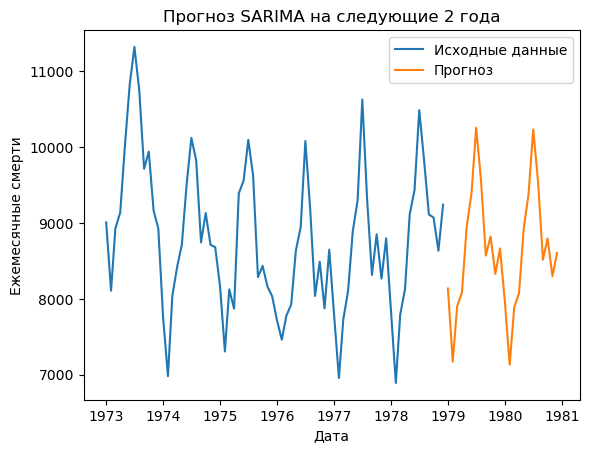

In [88]:
plt.plot(ts, label='Исходные данные')  # Нарисуем график, что б глазами посмотреть на результат 
plt.plot(forecast, label='Прогноз')
plt.title('Прогноз SARIMA на следующие 2 года')
plt.xlabel('Дата')
plt.ylabel('Ежемесячные смерти')
plt.legend()
plt.show()

123337.84635546427

In [ ]:
# Сейчас попробуем модель SARIMA с автоматическим подбором параметров 

In [91]:
!! pip install pmdarima

['Collecting pmdarima',
 '  Downloading pmdarima-2.0.3-cp39-cp39-win_amd64.whl (572 kB)',
 '     -------------------------------------- 572.7/572.7 kB 1.7 MB/s eta 0:00:00',
 'Requirement already satisfied: pandas>=0.19 in d:\\anaconda\\lib\\site-packages (from pmdarima) (1.4.4)',
 'Requirement already satisfied: urllib3 in d:\\anaconda\\lib\\site-packages (from pmdarima) (1.26.11)',
 'Requirement already satisfied: setuptools!=50.0.0,>=38.6.0 in d:\\anaconda\\lib\\site-packages (from pmdarima) (63.4.1)',
 'Requirement already satisfied: statsmodels>=0.13.2 in d:\\anaconda\\lib\\site-packages (from pmdarima) (0.13.2)',
 'Requirement already satisfied: scipy>=1.3.2 in d:\\anaconda\\lib\\site-packages (from pmdarima) (1.9.1)',
 'Requirement already satisfied: Cython!=0.29.18,!=0.29.31,>=0.29 in d:\\anaconda\\lib\\site-packages (from pmdarima) (0.29.32)',
 'Requirement already satisfied: scikit-learn>=0.22 in d:\\anaconda\\lib\\site-packages (from pmdarima) (1.0.2)',
 'Requirement already

In [93]:
from pmdarima import auto_arima

In [112]:
model = auto_arima(ts, order = True, m = 24)  
model.fit(ts)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 24),
      suppress_warnings=True, with_intercept=False)

In [114]:
pred_res2 = model.predict(n_periods=24)

In [115]:
pred_res2

1979-01-01     8459.853936
1979-02-01     7616.377308
1979-03-01     8405.156107
1979-04-01     8529.242659
1979-05-01     9609.117355
1979-06-01     9921.241602
1979-07-01    10928.762564
1979-08-01     9948.864189
1979-09-01     8820.797996
1979-10-01     9200.182195
1979-11-01     8741.120675
1979-12-01     9006.923300
1980-01-01     8306.469589
1980-02-01     7640.180081
1980-03-01     8303.449082
1980-04-01     8565.159426
1980-05-01     9439.348661
1980-06-01     9755.119470
1980-07-01    10838.622334
1980-08-01    10083.939283
1980-09-01     9195.388470
1980-10-01     9353.580115
1980-11-01     8845.134247
1980-12-01     9519.139977
Freq: MS, dtype: float64

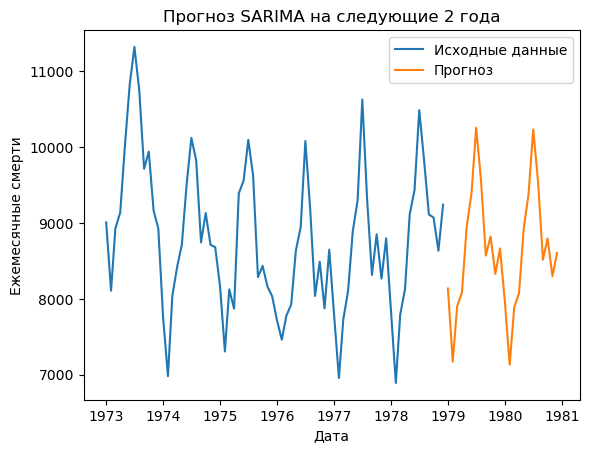

In [99]:
plt.plot(ts, label='Исходные данные')
plt.plot(forecast, label='Прогноз')
plt.title('Прогноз SARIMA на следующие 2 года')
plt.xlabel('Дата')
plt.ylabel('Ежемесячные смерти')
plt.legend()
plt.show()

In [ ]:
# Посчитаем среднеквадратическую ошибку между нашими двумя предсказаниями 

In [124]:
mse = mean_squared_error(pred_res1, pred_res2)
mse

123337.84635546427